## Homework 2
Hi everyone this is your seceond homework.

In this exercise, we intend to familiarize you more with classification, LDA, QDA algorithms.

You are free to discuss the problems and ways to approach them with your classmates, but be sure to not cheat. **Cheating will not be tolerated**.

# An introduce classification

**Classification** is a fundamental task in machine learning that involves categorizing data points into predefined classes or categories based on their features or characteristics. It plays a crucial role in various applications across industries, from image recognition and natural language processing to fraud detection and medical diagnosis. Here's a big picture overview of classification in machine learning:

You have learned data collection and processing and feature extraction and selectin in chapter 2.

There are various classification algorithms available, each with its strengths and weaknesses. The choice of algorithm depends on the nature of the data and the problem you are trying to solve. Common classification algorithms include:

1. Logistic Regression
2. Decision Trees
3. Random Forest
4. Support Vector Machines (SVM)
5. k-Nearest Neighbors (k-NN)
6. Naive Bayes
7. Gradient Boosting (e.g., XGBoost, LightGBM)

**Training the Model:**

* Once an algorithm is selected, the model is trained on a portion of the dataset (training data). During training, the algorithm learns to recognize patterns and relationships between features and class labels.
* The model's parameters are adjusted iteratively to minimize a specific loss function, making it better at making accurate predictions.

**Model Evaluation:**

* To assess the model's performance, it is tested on a separate dataset (validation or test data) that it has not seen during training. Common evaluation metrics for classification tasks include accuracy, precision, recall, F1-score, and area under the Receiver Operating Characteristic (ROC-AUC) curve.
* Cross-validation techniques may also be used to ensure robustness and avoid overfitting.

#Binary Classification

**Binary classification** is a fundamental concept in machine learning and statistics. It is a type of supervised learning task in which the goal is to categorize data points into one of two possible classes or categories. In binary classification, there are two mutually exclusive and exhaustive classes: the positive class (often labeled as "1" or "positive") and the negative class (labeled as "0" or "negative"). The objective is to assign each data point to one of these two classes based on its features or attributes.

Depond on the application, choosing a decision threshold for classifying data points into the positive or negative class is one of the most important thing that you should do. This threshold can be adjusted to achieve a desired trade-off between precision and recall.


##Introduction to Naive Bayes algorithm

In machine learning, Naïve Bayes classification is a straightforward and powerful algorithm for the classification task. Naïve Bayes classification is based on applying Bayes’ theorem with strong independence assumption between the features. Naïve Bayes classification produces good results when we use it for textual data analysis such as Natural Language Processing.

Naïve Bayes models are also known as simple Bayes or independent Bayes. All these names refer to the application of Bayes’ theorem in the classifier’s decision rule. Naïve Bayes classifier applies the Bayes’ theorem in practice. This classifier brings the power of Bayes’ theorem to machine learning.


##<font color="red">**Question 1**</font>

* Explain Naive Bayes algorithm and the "naive" assumption in Naive Bayes

###<font color="green">**Answer:**</font>
Naive Bayes is based on Bayes' theorem, which calculates the probability of a certain event happening based on prior knowledge of conditions related to the event. In the context of classification, it's used to predict the class label of a given data point.

The "naive" in Naive Bayes comes from the assumption that features used in the classification are conditionally independent, given the class label. In other words, Naive Bayes assumes that the presence or absence of a particular feature in a class is unrelated to the presence or absence of any other feature. This is a strong and often unrealistic assumption, but it simplifies the calculations significantly. Despite this simplification, Naive Bayes classifiers have been found to perform surprisingly well in many real-world situations.
The posterior probability of a data point with features $x_1, x_2,...,x_n$ belonging to class $C_k$ is claculated through the following formula:

$
P(C_k | x_1, x_2, \ldots, x_n) = \frac{P(C_k) \times P(x_1 | C_k) \times P(x_2 | C_k) \times \ldots \times P(x_n | C_k)}{P(x_1) \times P(x_2) \times \ldots \times P(x_n)}
$

##<font color="red">**Question 2**</font>
Explain the trade-off between precision and recall in the context of binary classification. Provide an example scenario where optimizing one metric might come at the expense of the other. How can this trade-off be managed to make an informed decision when building a classification model?


> <font color="orange">**Note:**</font>
Present a practical example scenario, such as a medical test for a rare disease. Explain how optimizing one metric (e.g., precision) may result in fewer false alarms (fewer healthy patients incorrectly identified as having the disease) but could miss some true cases of the disease (lower recall).


###<font color="green">**Answer:**</font>
At first let's explain precision and recall in details.

**Precision** is the ratio of correctly predicted positive observations to the total predicted positives. High precision indicates that the instances it classifies as positive are indeed positive.

$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$

**Recall** is the ratio of correctly predicted positive observations to all actual positives. High recall indicates that the classifier didn't miss many positive instances.

$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$

Consider a medical test for a rare disease where only 1 out of 10000 people actually have the disease. If the test is overly sensitive, it might classify many healthy individuals as positive to avoid missing any actual cases (high recall). However, this approach can lead to a lot of false alarms (low precision) and cause unnecessary worries and costs for patients who are incorrectly identified as having the disease.

On the other hand, if the test only classifies individuals as positive when the certainity is high (high precision), it might miss some true cases of the disease (low recall). This cautious approach reduces incorrect preditions, but it risks failing to diagnose people who actually have the disease.

To manage this trade-off, the F1 score can be used, which is the harmonic mean of precision and recall:

$F1 \text{ Score} = 2 \times \left( \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \right)
$

The F1 score provides a balance between precision and recall. Additionally, the choice between precision and recall depends on the specific problem and its consequences. In the medical example, if the disease is fatal and early detection is crucial, a higher recall might be preferred, even at the cost of precision.

##<font color="red">**Question 3**</font>
Now it's time to implement a naive bayse classifier and deal with a real dataset step by step. first you need to import some important libraries and <font color="blue">**adult.csv**</font> dataset.


> <font color="orange">**Note:**</font>
Don't Remember to analyse and explain each part

#### **Import libraries**

you can also import other libraries that you think is needed

In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

####**Import dataset**

Firstly, we import dataset and look at the columns:

In [39]:
# Your code:
path = '/content/adult.csv'
df = pd.read_csv(path)
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Fortunately, we don't have any null value in any column.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


####**Exploratory data analysis**

- **Use EDA, preprocess, data cleaning and other methods if necessary**


> <font color="orange">**Note:**</font>
If you use dataset.head(), you can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on.

Use the names of the following columns and replace them with the names of the current columns


**columns names:**

age, workclass, fnlwgt, education, education_num, marital_status, occupation, relationship,race, sex, capital_gain, capital_loss, hours_per_week, native_country, income

In [41]:
# Your Code
original_names = list(df.columns)
new_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
             'relationship','race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

names_dict = dict(zip(original_names, new_names))

df.rename(columns=names_dict, inplace=True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


There are a few columns that are not in numerical format. In the following, we convert them to numerical values.

In [42]:
for col in df.select_dtypes("object"):
    df[col] = df[col].factorize()[0]
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,0,83311,0,13,0,0,0,0,0,0,0,13,0,0
1,38,1,215646,1,9,1,1,1,0,0,0,0,40,0,0
2,53,1,234721,2,7,0,1,0,1,0,0,0,40,0,0
3,28,1,338409,0,13,0,2,2,1,1,0,0,40,1,0
4,37,1,284582,3,14,0,0,2,0,1,0,0,40,0,0


####**Declare feature vector and target variable**
**target value is income**

In [43]:
# Your code
target_var = df['income']
# df will be feature vector
df.pop('income')

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: income, Length: 32560, dtype: int64

####**Split data into separate training and test set**

We use %80 of dataset for training and %20 for testing

In [44]:
# Your Code
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, target_var,test_size = 0.20, random_state = 42)

####**Use feature engineering and feature scaling like StandardScale or RobustScale**

For many ML algorithms, it is necessary to scale features before training otherwise you won't achieve promising results.

In [45]:
# Your Code:
from sklearn.preprocessing import StandardScaler
# train
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# test
x_test_scaled = scaler.fit_transform(x_test)

####**Model training**

It is beneficial to have all things in one package! So we design a pipeline for this purpose to do scaling and training.

In [46]:
# Your Code
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

steps = [
    ('scalar', StandardScaler()),
    ('model', GaussianNB())
]

bayes_pipe = Pipeline(steps)
bayes_pipe.fit(x_train, y_train)
y_pred_test = bayes_pipe.predict(x_test)
y_pred_train = bayes_pipe.predict(x_train)

####**Check accuracy score and calulate f1-score, precision, recall**

On both training and test set, we have a high accuracy means that we classified many exmaples correctly but that's not enough! We have acceptable precision which indicates that the instances it classifies as positive are indeed positive. But we have low recall, shows that ourclassifier has a high number of False negatives which can be an outcome of imbalanced class or untuned model hyperparameters. And about F1-score, it is in the mid-way! Because it is dependant on both precision and recall and in our case just of one them had good results.

In [47]:
# Your Code
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
print("Model results (Test set):")
print('Accuracy: ', acc)
print('F1-score: ', f1)
print('Precision: ', prec)
print('Recall: ', recall)

print("/////////////////////////////////////")

acc_tr = accuracy_score(y_train, y_pred_train)
f1_tr = f1_score(y_train, y_pred_train)
prec_tr = precision_score(y_train, y_pred_train)
recall_tr = recall_score(y_train, y_pred_train)
print("Model results (Train set):")
print('Accuracy: ', acc_tr)
print('F1-score: ', f1_tr)
print('Precision: ', prec_tr)
print('Recall: ', recall_tr)

Model results (Test set):
Accuracy:  0.8253992628992629
F1-score:  0.5739977519670288
Precision:  0.7165575304022451
Recall:  0.47875
/////////////////////////////////////
Model results (Train set):
Accuracy:  0.8246314496314496
F1-score:  0.5599229287090558
Precision:  0.7021019569944431
Recall:  0.46563050793142124


####**Calculate class possibilites**

If we want to know class probs overall, we will use ***.class_prior*** to see results according to data:

In [48]:
# Your Code
bayes_pipe['model'].class_prior_

array([0.76040387, 0.23959613])

But we also want to know what prob our models attributed to each training example according to all classes:

In [49]:
train_probs = bayes_pipe.predict_proba(x_train)
np.set_printoptions(suppress=True)
train_probs

array([[0.99999861, 0.00000139],
       [0.99999977, 0.00000023],
       [1.        , 0.        ],
       ...,
       [0.90763536, 0.09236464],
       [0.99996839, 0.00003161],
       [0.99999874, 0.00000126]])

####**Use ROC-AUC and also k-Fold Cross Validation**

At first let's define ROC-AUC. A ROC-AUC score is a single metric to summarize the performance of a classifier across different thresholds. To compute the score, you must measure the area under the ROC curve. ROC curve is a plot that indicates a False Positive vs True Positive relation, where False Positive is on the X axis and True Positive is on the Y axis.  The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes. An AUC score of 1 means the classifier can perfectly distinguish between all the Positive and the Negative class points.

In [50]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import KFold

We split the dataset to 10 folds and evaluate our model based on AUC score and plot ROC curve:

In [51]:
cross_val = KFold(n_splits=10, random_state=42, shuffle=True)

In [52]:
df_np = df.to_numpy()
target_np = target_var.to_numpy()

AUC scores show that the trained model has a acceptable performance. Based on the results, the AUC ranage is from 0.85 to 0.87 which near to 1. It indicates that the model can distinguish between two classes properly.

[(-0.05, 1.05),
 (-0.05, 1.05),
 Text(0.5, 1.0, 'Receiver operating characteristic with CV')]

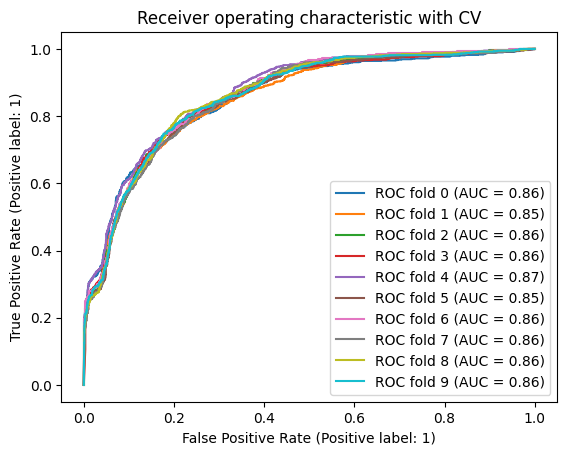

In [53]:
fig, ax = plt.subplots()
for index, (train, test) in enumerate(cross_val.split(df_np, target_np)):
	bayes_pipe.fit(df_np[train], target_np[train])
	plot = RocCurveDisplay.from_estimator(
		bayes_pipe, df_np[test], target_np[test],
		name="ROC fold {}".format(index),
		ax=ax,
	)

ax.set(
	xlim=[-0.05, 1.05],
	ylim=[-0.05, 1.05],
	title="Receiver operating characteristic with CV",
)

#### **Results and conclusion**
Briefly explain what you did and what you got

#####<font color="green">**Answer:**</font> In summary, we trained a naive bayes classifier on our dataset to predict income classes. The accuracy on both train and test set was relatively high but recall was low which indicates that the model's ability to detect positive classes is not satisfactory.
At the end, we plotted ROC curve and computed AUC score with K-Fold cross validation. The results were acceptable but still it should be better.

#KNN

##<font color="red">**Question 4**</font>


- Explain the k-Nearest Neighbors (k-NN) algorithm and its fundamental principle

###<font color="green">**Answer:**</font>
The k-Nearest Neighbors (k-NN) algorithm is a simple ML algorithm. It can be used for both classification and regression tasks. The fundamental principle behind k-NN is based on the idea that objects or instances that are close to each other in the feature space are likely to belong to the same class or have similar values for regression tasks.

**Algorithm Steps:**


1.   **Input Data**: The algorithm starts with a labeled dataset, where each data point has a set of features and a corresponding label (for classification) or numeric value (for regression).

2.  **Distance Metric**: The algorithm computes the distance between the input data point and every data point in the training set. Common distance metrics include Euclidean distance, Manhattan distance, or Minkowski distance.

3. **Finding Neighbors**: It then identifies the k-nearest data points (neighbors) to the input data point based on the computed distances. "k" is a user-defined constant representing the number of nearest neighbors to consider.

4. **Majority Vote (for Classification) or Weighted Average (for Regression)**: For a classification task, the algorithm counts the occurrences of each class among the k-nearest neighbors and assigns the class with the highest count to the given data point.
For a regression task, the algorithm calculates the average (or weighted average) of the numeric values of the k-nearest neighbors and assigns this value to the given data point.



##<font color="red">**Question 5**</font>
You're expected implement a K-Nearest Neighbors classifier. first import <font color="blue">**glass.csv**</font>. extract **Type column** as a target.

#### **Import libraries**

you can also import other libraries that you think is needed

In [54]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization

####**Import dataset**

In [55]:
# Your code:
path = '/content/glass.csv'
df_glass = pd.read_csv(path)
df_glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


####**Exploratory data analysis**

- **Data review (EDA, data cleaning, preprocess,...)**

No null values, No categorical column. We just will apply feature scaling for training

In [56]:
# Your Code
df_glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [57]:
df_glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


####**Data visualization**

- **Visualize the number of type in the dataset**
- **Use barplot, scatter plot,...**

We have 5 distinct types in dataset and unfortunately the distribution of classes is uneven and due to this it's likely to have problems in training our model:

<Axes: xlabel='Type', ylabel='count'>

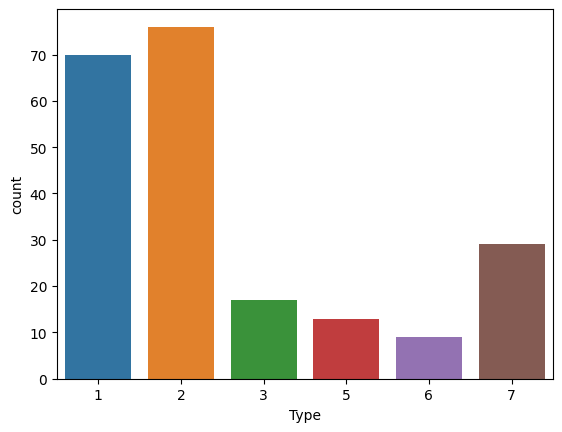

In [58]:
# Your Code
sns.countplot(x = df_glass['Type'])

In this plot, we visualized the amount of each material and RI. Most of the materials are placed in a ceratin part but about **Si** is not true; we observe it on the other side:

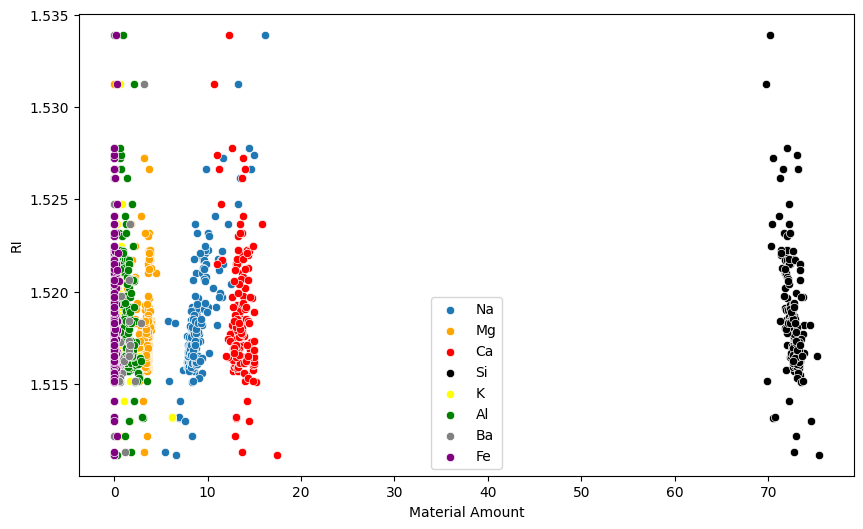

In [59]:
plt.figure(figsize=(10,6));
sns.scatterplot(x="Ca",y="RI",data=df_glass);
sns.scatterplot(x="Mg",y="RI",data=df_glass, color="orange");
sns.scatterplot(x="Na",y="RI",data=df_glass,color="red");
sns.scatterplot(x="Si",y="RI",data=df_glass,color="black");
sns.scatterplot(x="K",y="RI",data=df_glass,color="yellow");
sns.scatterplot(x="Al",y="RI",data=df_glass,color="green");
sns.scatterplot(x="Ba",y="RI",data=df_glass,color="gray");
sns.scatterplot(x="Fe",y="RI",data=df_glass,color="purple");
plt.xlabel("Material Amount");
plt.legend(["Na","Mg","Ca","Si","K","Al","Ba","Fe"]);

If we look the correlations especially the ones which are related to Type, Na, Al and Ba are highly (positibely) correlated to Type:  

<Axes: >

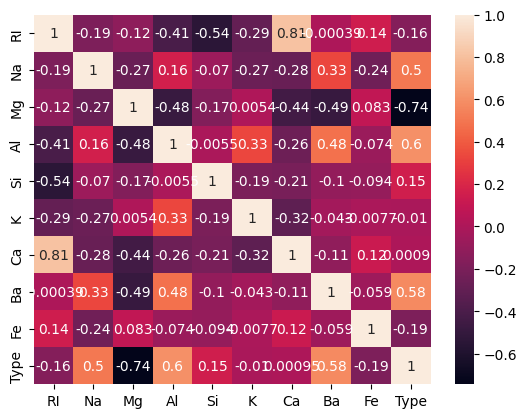

In [60]:
sns.heatmap(df_glass.corr(),annot=True)

####**Data preparing for KNN**


At first we prepare our target column:

In [61]:
target = df_glass.pop("Type")

Then we will split our dataset to test and train:

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_glass, target, test_size = 0.20, random_state = 42)

In this step, we prepare our pipeline for training and also scaling data:

In [63]:
from sklearn.neighbors import KNeighborsClassifier
steps = [
    ('scalar', StandardScaler()),
    ('model', KNeighborsClassifier())
]

knn_pipe = Pipeline(steps)

####**Training Model**


Now we finally train our model!

In [64]:
knn_pipe.fit(x_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('model', KNeighborsClassifier())])

It's time to compute performance metrics for our model:

In [65]:
y_pred_test = knn_pipe.predict(x_test)
y_pred_train = knn_pipe.predict(x_train)

Because we have a multiclass classification problem, we need to apply some changes in our performance metrics to work for our case. I chose **micro average** for this purpose. It treats each class equally for example about precsion, it uses all TPs in all of the classes and so on.

The model performance is just in the middle, not so good, not so bad! 0.7 is the score that we have in most of metrics. We can work on hyperparameter tuning.

In [66]:
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test,average='micro')
prec = precision_score(y_test, y_pred_test,average='micro')
recall = recall_score(y_test, y_pred_test, average='micro')
print("Model results (Test set):")
print('Accuracy: ', acc)
print('F1-score: ', f1)
print('Precision: ', prec)
print('Recall: ', recall)

print("/////////////////////////////////////")

acc_tr = accuracy_score(y_train, y_pred_train)
f1_tr = f1_score(y_train, y_pred_train, average='micro')
prec_tr = precision_score(y_train, y_pred_train, average='micro')
recall_tr = recall_score(y_train, y_pred_train, average='micro')
print("Model results (Train set):")
print('Accuracy: ', acc_tr)
print('F1-score: ', f1_tr)
print('Precision: ', prec_tr)
print('Recall: ', recall_tr)

Model results (Test set):
Accuracy:  0.6976744186046512
F1-score:  0.6976744186046512
Precision:  0.6976744186046512
Recall:  0.6976744186046512
/////////////////////////////////////
Model results (Train set):
Accuracy:  0.7660818713450293
F1-score:  0.7660818713450293
Precision:  0.7660818713450293
Recall:  0.7660818713450293


####**Find the best parameter of n_neighbors**
> <font color="orange">**Note:**</font>
**Use GridSearchCV**

For GridSearch, we consider range of 1 to 30 neighbors but the best result according to f1_micro is just one neighbor!

In [67]:
# Your Code
from sklearn.model_selection import GridSearchCV
params = {"model__n_neighbors":list(range(1, 30))}
classifier_knn = GridSearchCV(knn_pipe, params, scoring='f1_micro', cv = 5)
classifier_knn = classifier_knn.fit(x_train, y_train)
print("Best Hyperparameters:", classifier_knn.best_params_)

Best Hyperparameters: {'model__n_neighbors': 1}


1, 2, 3 and 4 are our top results but interestingly 10 neighbors is in the fifth rank!

In [68]:
res_df = pd.DataFrame(classifier_knn.cv_results_)
res_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006281,0.001596,0.008658,0.002732,1,{'model__n_neighbors': 1},0.685714,0.617647,0.764706,0.764706,0.647059,0.695966,0.060135,1
1,0.003580,0.000075,0.005437,0.000098,2,{'model__n_neighbors': 2},0.600000,0.588235,0.705882,0.764706,0.617647,0.655294,0.068559,2
2,0.003614,0.000107,0.005612,0.000324,3,{'model__n_neighbors': 3},0.514286,0.676471,0.764706,0.647059,0.617647,0.644034,0.081430,3
3,0.004061,0.000522,0.007517,0.001850,4,{'model__n_neighbors': 4},0.571429,0.617647,0.735294,0.735294,0.558824,0.643697,0.077311,4
4,0.004759,0.000677,0.008023,0.002051,5,{'model__n_neighbors': 5},0.571429,0.588235,0.647059,0.617647,0.588235,0.602521,0.026786,11
5,0.003690,0.000413,0.006285,0.001887,6,{'model__n_neighbors': 6},0.571429,0.529412,0.676471,0.647059,0.617647,0.608403,0.052573,9
6,0.006221,0.003695,0.007776,0.001843,7,{'model__n_neighbors': 7},0.600000,0.558824,0.705882,0.617647,0.617647,0.620000,0.048020,8
7,0.003581,0.000191,0.005471,0.000216,8,{'model__n_neighbors': 8},0.571429,0.558824,0.676471,0.705882,0.617647,0.626050,0.057426,6
8,0.003401,0.000086,0.005640,0.000552,9,{'model__n_neighbors': 9},0.571429,0.558824,0.647059,0.676471,0.588235,0.608403,0.045518,9
9,0.003532,0.000067,0.005413,0.000055,10,{'model__n_neighbors': 10},0.600000,0.588235,0.676471,0.705882,0.617647,0.637647,0.045656,5


#### **Results and conclusion**
Briefly explain what you did and what you got

#####<font color="green">**Answer:**</font> In this section, we trained a KNN model on glass dataset that was a multi-class problem. At first we trained KNN model without parameter tuning but in the next step, using GridSearchCV, we tuned number of neighbors for KNN. Our top 5 results were for 1, 2, 3, 4 and 10 neighbors; it seems that fewer neighbors will give us better results.

#Multi-class Classification
**Multi-class classification** is a type of supervised machine learning task where the goal is to assign a single input data point to one of multiple possible classes or categories.

##<font color="red">**Question 6**</font>

- What are two strategies of classify multi-class data? explain both and their differences.

###<font color="green">**Answer:**</font>
Suppose we have a dataset with **n** different classes. The available stategies are:
1. One way to create a system that can classify data into **n** classes is to train **n** binary classifiers, one for each class. Then when you want to classify a data point, you get the decision score from each classifier for that point and you select the class whose classifier outputs the highest score. This is called the ***one-versus-the-rest (OvR) strategy***, or sometimes ***one-versus-all (OvA)***.

2. Another strategy is to train a binary classifier for every pair of classes. This is called the **one-versus-one (OvO) strategy**. With ***n*** classes, you need to train n × (n – 1) / 2 classifiers. The main advantage of OvO is that each classifier only needs to be trained on the part of the training set containing the two classes that it must distinguish.

##<font color="red">**Question 7**</font>

So you are going to implement a multi-class classification. the one thing you should do is importing <font color="blue">**mobile price**</font> dataset. Target column is **price_range**.

> <font color="orange">**Note:**</font> Your code should be readable and with a lot ot explaination


#### **Import libraries**

you can also import other libraries that you think is needed

In [69]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization

####**Import dataset**

In [70]:
# Your code:
train_df = pd.read_csv('/content/train.csv')
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


####**Exploratory data analysis**

- **If necessary EDA, data cleaning, preprocess...**

Again no null values, no categorical column! So we just need to scaler for model training!

In [71]:
# Your Code
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [72]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


####**Data visualization**

- **corr, hist...**

We have a balanced ditsribution for mobile phone price range:

Text(0.5, 1.0, 'Distribution of Phones Across Price Ranges')

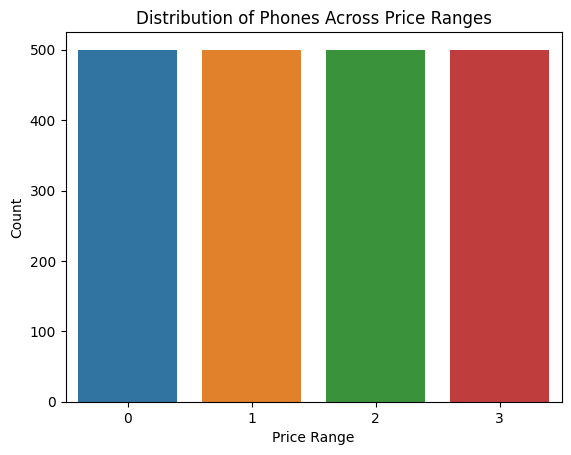

In [73]:
# Create a count plot for the price_range variable
sns.countplot(data=train_df, x='price_range')

# Labeling the axes and title
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Distribution of Phones Across Price Ranges')

If we consider price range, ***ram*** is highly correlated to it:

<Axes: >

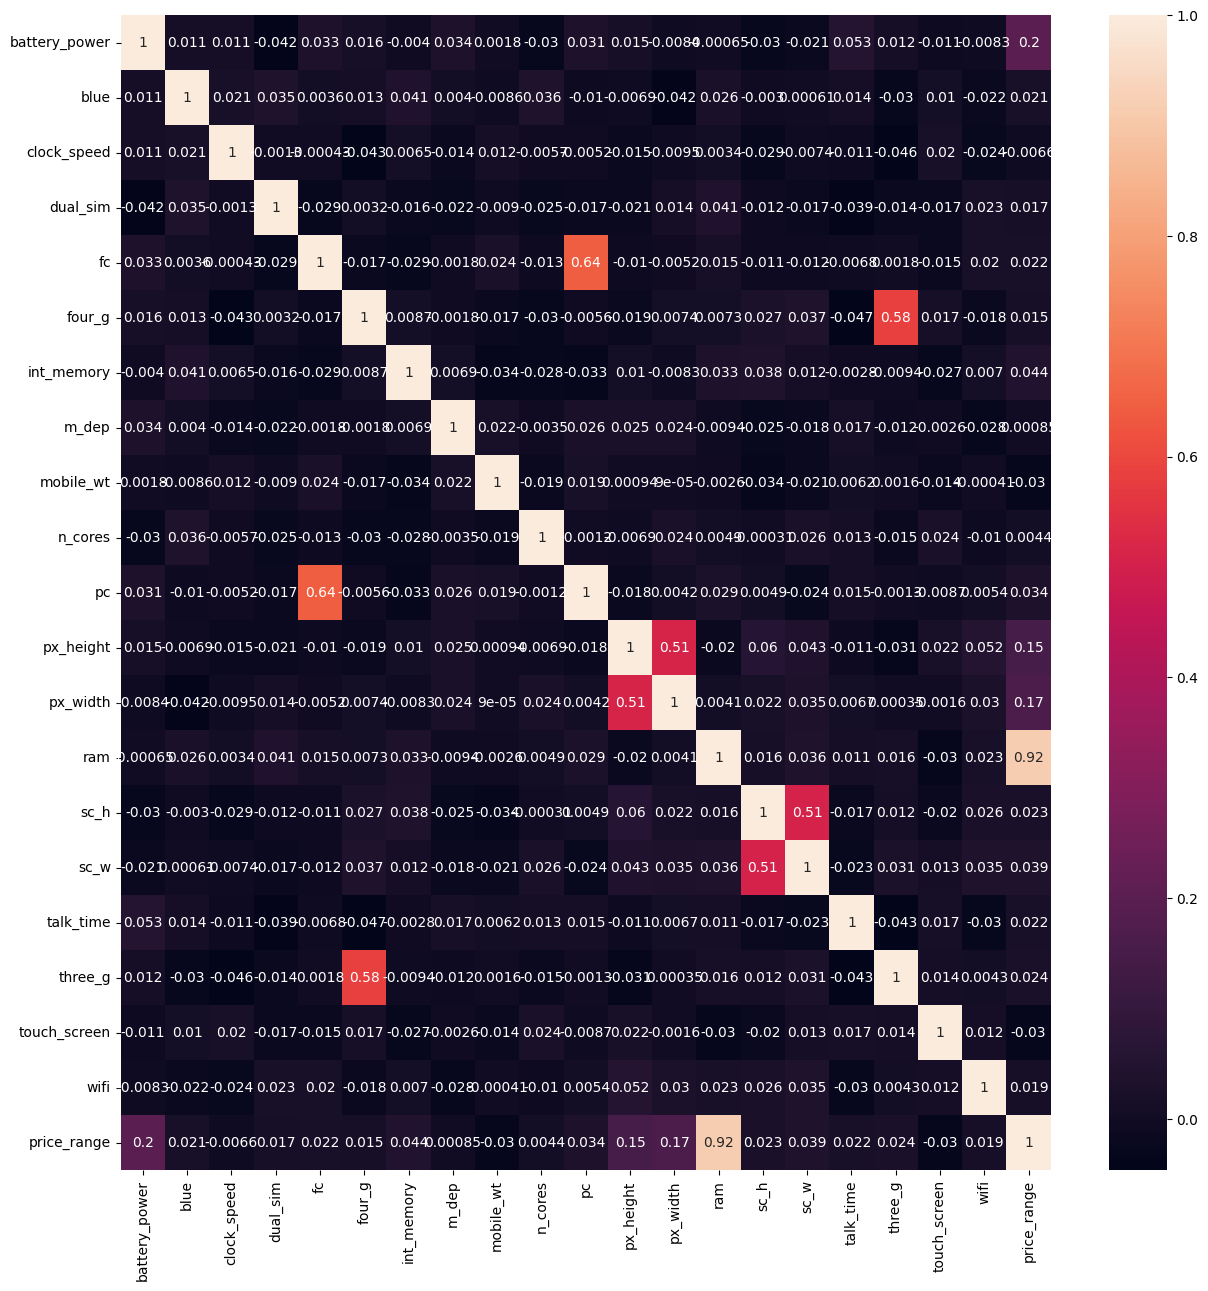

In [74]:
# Your Code
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(train_df.corr(),annot=True, ax=ax)

####**Data preparing**


We just extract target column from our dataset and split it to test and train sections. In next steps, we will design pipelines and place feature scaler into it:

In [75]:
# Your Code
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
label = train_df.pop('price_range')
x_train, x_test, y_train, y_test = train_test_split(train_df, label, test_size = 0.20, random_state = 42)

####**Training Model**
Choose at least two common algorithms like:
- k-Nearest Neighbors.
- Decision Trees.
- Naive Bayes.
- Random Forest.

**KNN**

In [76]:
# Your Code
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
knn_steps = [
    ('scalar', StandardScaler()),
    ('model', KNeighborsClassifier())
]

knn_pipe = Pipeline(knn_steps)
knn_pipe.fit(x_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('model', KNeighborsClassifier())])

In [77]:
pred_test_knn = knn_pipe.predict(x_test)
pred_train_knn = knn_pipe.predict(x_train)

**Random Forest**

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf_steps = [
    ('scalar', StandardScaler()),
    ('model', RandomForestClassifier())
]

rf_pipe = Pipeline(rf_steps)
rf_pipe.fit(x_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('model', RandomForestClassifier())])

In [79]:
pred_test_rf = rf_pipe.predict(x_test)
pred_train_rf = rf_pipe.predict(x_train)

####**Show and analyze confusion matrix, recall, accuracy, precision and other metrics that you think is useful**

At first we display confusion matrix:

**KNN**

Test Dataset:

We had 4 classes and if we consider that our model indentified which class better, it is class 0 because it preicted 76 examples correctly:

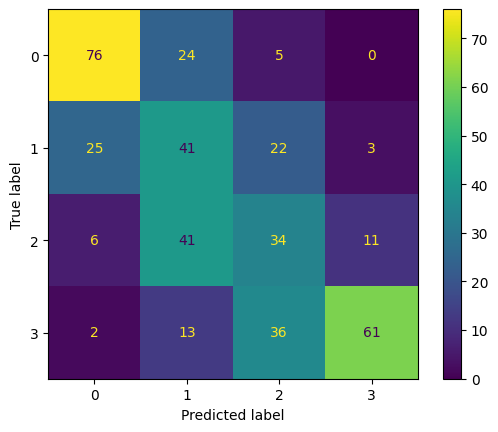

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, pred_test_knn)

Train Dataset:

We have same scenario on train dataset. Maybe a reason that our model preidcted class 0 better is due to underlying patterns in train data:

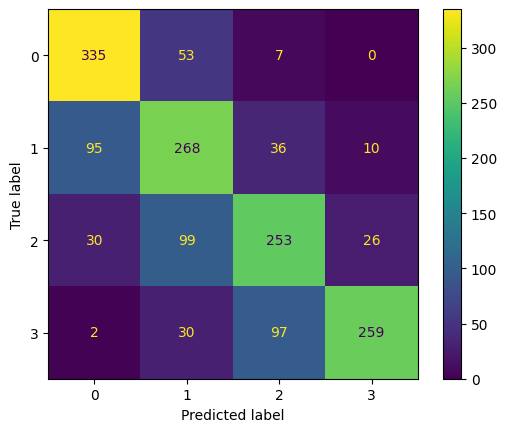

In [81]:
ConfusionMatrixDisplay.from_predictions(y_train, pred_train_knn)

**Random Forest**

Test Dataset:

According to confusion matrix, Random Forest is superior to KNN because it performed incredibly better than KNN. It is obvious that we just have a few misclassified examples:

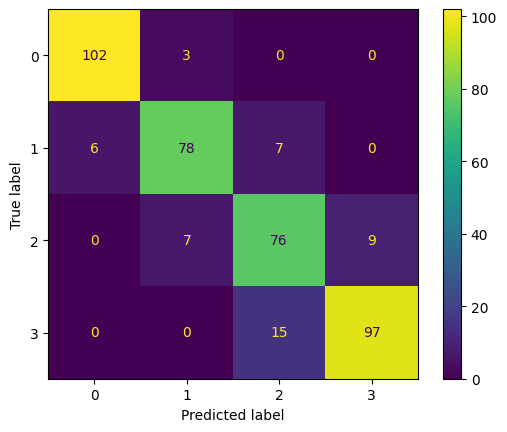

In [82]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_test_rf)

Train Dataset:

On the train datatset, RF predicted all of the classes without any mistake. At the first look, it is likely that we have overfitting in this case. Although, we deal with overfitting, but results on test set showed a noticeable performance:

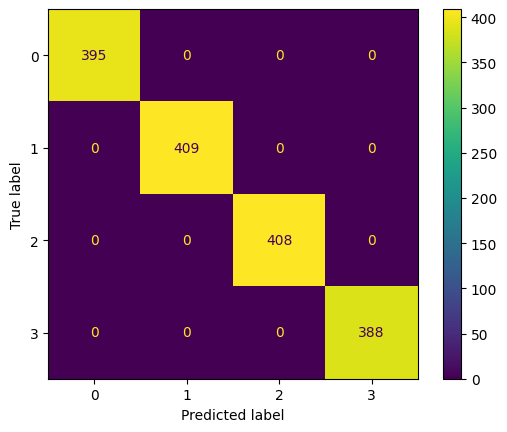

In [83]:
ConfusionMatrixDisplay.from_predictions(y_train, pred_train_rf)

Now we calculate performance metrics for both models:

**KNN**

In [84]:
acc = accuracy_score(y_test, pred_test_knn)
f1 = f1_score(y_test, pred_test_knn,average='micro')
prec = precision_score(y_test, pred_test_knn,average='micro')
recall = recall_score(y_test, pred_test_knn, average='micro')
print("Model results (Test set):")
print('Accuracy: ', acc)
print('F1-score: ', f1)
print('Precision: ', prec)
print('Recall: ', recall)

print("/////////////////////////////////////")

acc_tr = accuracy_score(y_train, pred_train_knn)
f1_tr = f1_score(y_train, pred_train_knn, average='micro')
prec_tr = precision_score(y_train, pred_train_knn, average='micro')
recall_tr = recall_score(y_train, pred_train_knn, average='micro')
print("Model results (Train set):")
print('Accuracy: ', acc_tr)
print('F1-score: ', f1_tr)
print('Precision: ', prec_tr)
print('Recall: ', recall_tr)

Model results (Test set):
Accuracy:  0.53
F1-score:  0.53
Precision:  0.53
Recall:  0.53
/////////////////////////////////////
Model results (Train set):
Accuracy:  0.696875
F1-score:  0.696875
Precision:  0.696875
Recall:  0.696875


**Random Forest**

In [85]:
acc = accuracy_score(y_test, pred_test_rf)
f1 = f1_score(y_test, pred_test_rf,average='micro')
prec = precision_score(y_test, pred_test_rf,average='micro')
recall = recall_score(y_test, pred_test_rf, average='micro')
print("Model results (Test set):")
print('Accuracy: ', acc)
print('F1-score: ', f1)
print('Precision: ', prec)
print('Recall: ', recall)

print("/////////////////////////////////////")

acc_tr = accuracy_score(y_train, pred_train_rf)
f1_tr = f1_score(y_train, pred_train_rf, average='micro')
prec_tr = precision_score(y_train, pred_train_rf, average='micro')
recall_tr = recall_score(y_train, pred_train_rf, average='micro')
print("Model results (Train set):")
print('Accuracy: ', acc_tr)
print('F1-score: ', f1_tr)
print('Precision: ', prec_tr)
print('Recall: ', recall_tr)

Model results (Test set):
Accuracy:  0.8825
F1-score:  0.8825
Precision:  0.8825
Recall:  0.8825
/////////////////////////////////////
Model results (Train set):
Accuracy:  1.0
F1-score:  1.0
Precision:  1.0
Recall:  1.0


#### **Results and conclusion**
Briefly explain what you did and what you got

#####<font color="green">**Answer:**</font> In this section, our problem was multi-class classification with 4 classes. We utilized two different models for this purpose to discover that which model is superior. KNN and Random Forest were our choices. Rnadom Forest performance was much better than KNN. Random Forest is more accurate and robust than KNN so we expect that RF will give us better results.

#LDA and QDA

##Linear Discriminant Analysis (LDA)
Linear Discriminant Analysis is a supervised machine learning algorithm used for dimensionality reduction and classification. Its primary goal is to find a linear combination of features that best separates two or more classes in the data. LDA is particularly useful when you have labeled data and want to reduce the dimensionality while preserving class separability.

##Quadratic Discriminant Analysis (QDA)
Quadratic Discriminant Analysis is another supervised classification and dimensionality reduction technique used for similar purposes as LDA. However, it differs from LDA in a few key ways.

###<font color="red">**Question 7**</font>

- Contrast the key differences between Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA). How do these differences impact the decision boundaries and flexibility of the two algorithms?

- If the Bayes decision boundary is linear, do we expect LDA or QDA to perform better on the training set? On the test set?

- If the Bayes decision boundary is non-linear, do we expect LDA or QDA to perform better on the training set? On the test set?

####<font color="green">**Answer:**</font>


1.   Let's look how these two algorithms work in different areas:


*   **Assumption:**LDA assumes that the classes have the same covariance matrix, meaning that the variance within each class is the same for all classes. It also assumes that the features are normally distributed within each class. In contrast, QDA allows each class to have its own covariance matrix, meaning that it does not assume equal variances across classes. Like LDA, it also assumes that the features are normally distributed within each class.

*   **Decision Boundary:**LDA computes linear decision boundaries. This decision boundary is the same for all classes because it assumes a common covariance matrix. While QDA computes quadratic decision boundaries. In a two-class problem, it can create a curved decision boundary, allowing for more complex shapes to separate the classes compared to LDA.

*   **Flexibility:**LDA is less flexible than QDA due to its assumption of equal covariance matrices. This can be an advantage because it reduces the risk of overfitting, especially when the number of training samples is small relative to the number of features. On the other hand, the increased flexibility of QDA can be an advantage when the classes have significantly different variances or when the data does not follow a multivariate normal distribution within each class. However, this flexibility can also lead to a higher risk of overfitting.


2.   If the Bayes decision boundary is linear, meaning that the true boundary that separates the classes in the underlying data distribution is a straight line. We now see that what is the effect of it:

    **On the Training Set:**
    * LDA assumes a linear decision boundary, which matches the true underlying pattern in the data. When the Bayes decision boundary is linear, LDA's assumption aligns with the true relationship, making it a good fit for the data. QDA decision boundaries can model more complex patterns than linear boundaries. However, when the true boundary is linear, the additional complexity introduced by quadratic decision boundaries is unnecessary and may lead to overfitting on the training data.

    Therefore, it seems that LDA will perform better on training data because LDA's assumption aligns with the true relationship, leading to accurate parameter estimates and a good fit to the training data.

    **On the Test Set:**
    * LDA's assumption about decision boundary fits with underlying data so it is likely to generalize well to unseen data. Due to this linear boundary assumption, LDA is expected to perform well on the test set. In contrast, QDA has a complex and quadratic decision boundary, while the real pattern in data is linear. Its additional complexity might lead to overfitting on the training data. Overfitted models often perform poorly on unseen data because they capture noise in the training set as if it were a real pattern, which does not generalize well.

    In conclusion, if the Bayes decision boundary is linear, LDA is expected to perform better both on the training set and on the test set.

3. If the Bayes decision boundary is non-linear, meaning that the true boundary that separates the classes is a curved line. Now we see what will happen with LDA and QDA:

    **On the Training and Test Set:**
    *  LDA assumes a linear cannot capture the non-linear patterns in the data. Our true decision boundary is non-linear while LDA assumes it linear  leading to poor parameter estimation and a poor fit to the training data. As we see underfitting will be a definite scenario. QDA's quadritic decision boundary will capture non-linear patterns in data properly so it's a better choice to fit on training data and recognize complex patterns.

    **On the Test Set:*In the last part, we said that we will have underfitting in the case of LDA. LDA's underfitting of the training data will carry over to the test set, resulting in suboptimal performance. QDA is expected to perform better on the test set as well. While it is more flexible, it can still generalize effectively if the complexity introduced by the non-linear decision boundary in the training data reflects the true underlying data distribution.

 Therefore. QDA will have a better performance on both training set and test set if the Bayes decision boundary is non-linear.




###<font color="red">**Question 8**</font>

This question should be answered using the <font color="blue">**Weekly**</font> data set

#### **Import libraries**

you can also import other libraries that you think is needed

In [86]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization

####**Import dataset**

In [87]:
!pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 kB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 37.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 55.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=2398fb5831aa8f0c1ab8ab9e10ce13f5fc4d2bb567603d419dd21962e7954d7d
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    U

In [88]:
from ISLP import load_data
Weekly = load_data('Weekly')

####**a) Produce some numerical and graphical summaries of the Weekly data**

In [89]:
# Your Code
Weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


All of our features are in numerical format except "Direction" that is our target label and we will transform it to numerical in next steps. We don't have any null values in the dataset.

In [90]:
Weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


Here we can see distribution of our classes in dataset. Instances in "Up" are slightly more than "Down" class:

<Axes: xlabel='Direction', ylabel='count'>

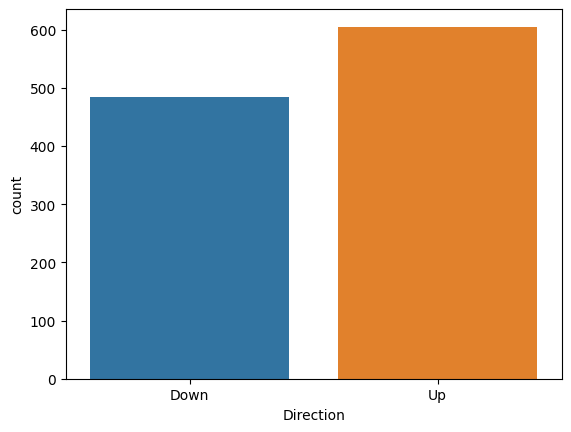

In [91]:
# Your Code
sns.countplot(x = Weekly['Direction'])

To calculate correlation, at first we should convert direction column to numerical format. It is obvious that most of features have low correlation with "Direction". The feature that has higher correlation compared with others is "Lag2". Other features that have high correlation are these two groups; (Year, Volume) and (Today, Direction):

<Axes: >

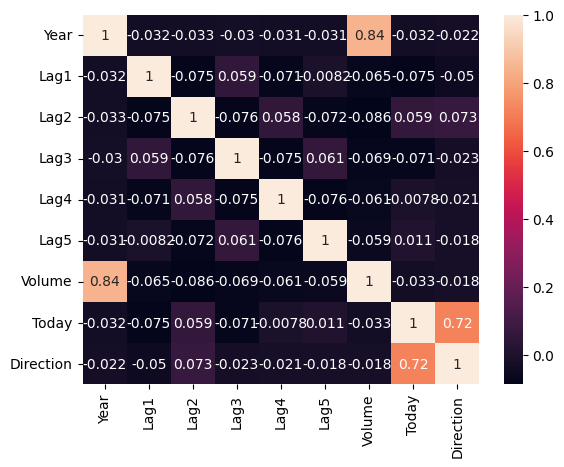

In [92]:
Weekly['Direction'] = Weekly['Direction'].factorize()[0]
sns.heatmap(Weekly.corr(),annot=True)

- Do there appear to be any patterns? Answer in above cells

####**b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results**

Firstly, we obtain our target column and scale the predictors:

In [93]:
from sklearn.preprocessing import StandardScaler
df = Weekly.copy()
target = df.pop('Direction')
predictors = df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
scaler = StandardScaler()
train_data = scaler.fit_transform(predictors)

Now Everything is ready to train our model!

In [94]:
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit

# Your code
model = Logit(target.to_numpy(), train_data)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.688685
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1083
Method:                           MLE   Df Model:                            5
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:               -0.002509
Time:                        21:00:26   Log-Likelihood:                -749.98
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0965      0.062     -1.557      0.119      -0.218       0.025
x2             0.1361      0.063      2.160      0.031       0.013       0.260
x3            -0.0359      0.062     -0.575      0.565      -0.158       0.086
x4            -0.0638      0.062     -1.029      0.304      -0.185       0.058
x5            -0.0333      0.062     -0.539      0.590      -0.155       0.088
x6            -0.0390      0.062     -0.629      0.529      -0.161       0.083
==============================================================================
"""

- Do any of the predictors appear to be statistically significant? If so, which ones?

**َAnswer**: In the model summary, features coefficients are listed. It seems that "x2" that is actually "Lag2" has the most important feature in predicting "Direction"; Because it has the largest coefficient. Other features have low and negative coefficients, so maybe they are not suitable predictors for "Direction".

####**c) Compute the confusion matrix and overall fraction of correct predictions**

The "results" has a function named predict that will return the prob of each instance according to model prediction. But for confusion matrix, we need the exact label for each of them. We consider threshold "0.5" for this purpose; it means that if the prob of an example is higher than 0.5, it belongs to class 1 and vice versa.

Our correct predictions are **251 + 329 = 580** and our overall examples are 1089. The fraction of correct predictions to all predictions is **580 / 1089 = % 53**. Obviously it is low accuracy for our model. The reason behind this is that maybe our model needs hyperparameter tuning or logistic regression can't capture patterns in data and we need a more complex model.

Unfortunately, we have many examples in FN and FP sections, especially for class 0 where our model classified most of the data points in class 1 instead of 0. Maybe we need feature engineering to extract better features for this problem.

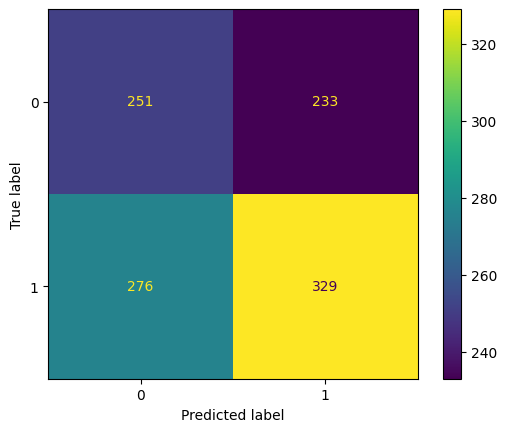

In [95]:
# Your Code
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred = results.predict()
pred_n = (pred > 0.5).astype(int)
ConfusionMatrixDisplay.from_predictions(target, pred_n)

- Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

**Answer in above cells**

####**d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).**

In [96]:
# Your Code
selected_df = Weekly[(Weekly.Year >= 1990) & (Weekly.Year <= 2008)]
target = selected_df['Direction']
predictors = selected_df[['Lag2']]
scaler = StandardScaler()
train_data = scaler.fit_transform(predictors)

An interesting fact in here is that the coefficient of Lag2 is approximately same as the previous model, reminds us its effect in prediction.

In [97]:
model = Logit(target.to_numpy(), train_data)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.691049
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  985
Model:                          Logit   Df Residuals:                      984
Method:                           MLE   Df Model:                            0
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:               -0.004915
Time:                        21:00:27   Log-Likelihood:                -680.68
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1308      0.065      2.014      0.044       0.003       0.258
==============================================================================
"""

Now it's time to evaluate our model according to test data!

In [98]:
test = Weekly.drop(selected_df.index)
target_test = test['Direction']
predictors_test = test[['Lag2']]
test_data = scaler.fit_transform(predictors_test)

Our correct predictions are **21 + 31 = 52** and overall we have 104 data points in test set. Accuracy on test set is **52 / 104 = %50** roughly same as the last model. We can colclude that other features instead of **"Lag2"** don't affect so much in our results and we can eliminate them becuase removing them does not hurt our performance highly.

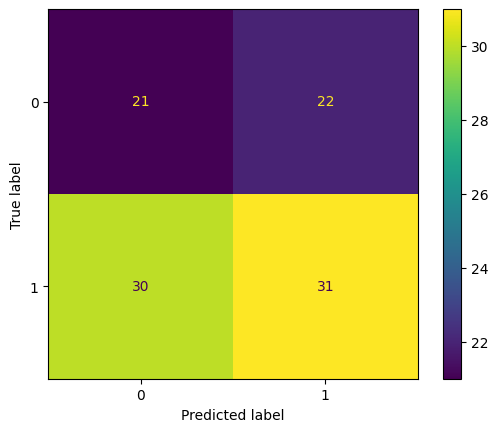

In [99]:
pred = results.predict(test_data)
pred_n = (pred > 0.5).astype(int)
ConfusionMatrixDisplay.from_predictions(target_test, pred_n)

In [100]:
recall = recall_score(target_test, pred_n)
precision = precision_score(target_test, pred_n)
f1 = f1_score(target_test, pred_n)
print("Recall: ", recall)
print("Precsion: ", precision)
print("F1: ", f1)

Recall:  0.5081967213114754
Precsion:  0.5849056603773585
F1:  0.5438596491228069


####**e) Repeat (d) using LDA**

In [101]:
# Your Code
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(train_data, target)

LinearDiscriminantAnalysis()

Our correct predictions are **4 + 59 = 63** and overall we have 104 data points in test set. Accuracy on test set is **63 / 104 = %60**. It shows our accuracy is increased by %10. It can be a sign that LDA is more suitable option in this problem.

We have higher recall and lower precision in this problem which indicates that the model is good at identifying positive instances (true positives), but it also tends to incorrectly classify negative instances as positive (false positives). This means the model is more likely to over-predict the positive class.

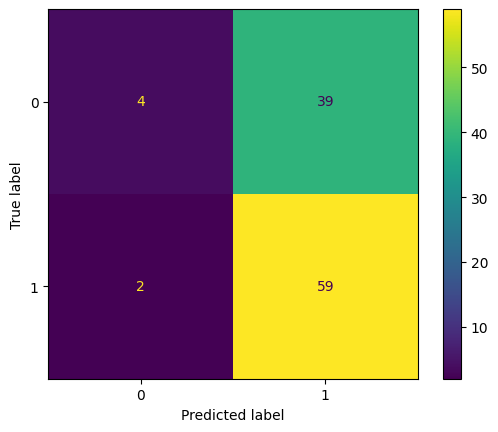

In [102]:
pred = lda_model.predict(test_data)
conf_mat = confusion_matrix(target_test, pred)
ConfusionMatrixDisplay.from_predictions(target_test, pred)

In [103]:
from sklearn.metrics import recall_score, precision_score, f1_score
recall = recall_score(target_test, pred)
precision = precision_score(target_test, pred)
f1 = f1_score(target_test, pred)
print("Recall: ", recall)
print("Precsion: ", precision)
print("F1: ", f1)

Recall:  0.9672131147540983
Precsion:  0.6020408163265306
F1:  0.7421383647798743


####**f) Repeat (d) using QDA**

In [104]:
# Your Code
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(train_data, target)

QuadraticDiscriminantAnalysis()

Our correct predictions are **0 + 61 = 61** and overall we have 104 data points in test set. Accuracy on test set is **61 / 104 = %58**.  Our accuracy is lower than compared to LDA but important event is that FN and TN are 0 and recall equals to 1! Our model predicted no exmaple of class 0 correctly!

LDA could be a better fit to this data and it seems that we have linear patterns in our data beucase LDA had a better performance.

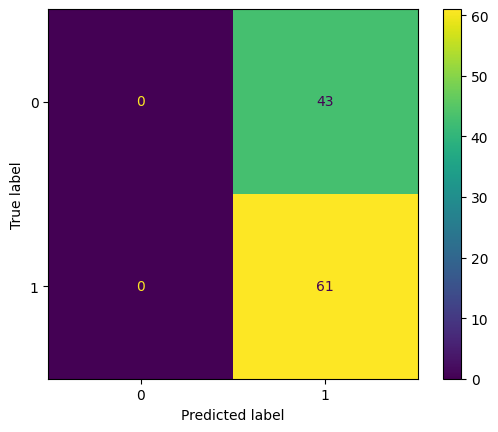

In [105]:
pred = qda_model.predict(test_data)
ConfusionMatrixDisplay.from_predictions(target_test, pred)

In [106]:
recall = recall_score(target_test, pred)
precision = precision_score(target_test, pred)
f1 = f1_score(target_test, pred)
print("Recall: ", recall)
print("Precsion: ", precision)
print("F1: ", f1)

Recall:  1.0
Precsion:  0.5865384615384616
F1:  0.7393939393939394


####**g) Repeat (d) using KNN with K = 1**

In [107]:
# Your Code
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(train_data, target)

KNeighborsClassifier(n_neighbors=1)

Our correct predictions are **18 + 34 = 52** and overall we have 104 data points in test set. Accuracy on test set is **52 / 104 = %50**.  KNN accuracy is like logistic regression model but it performance was poorer than QDA and LDA. Both recall and precision are lower than LDA and QDA and our model mispredicted most of the examples in two classes.

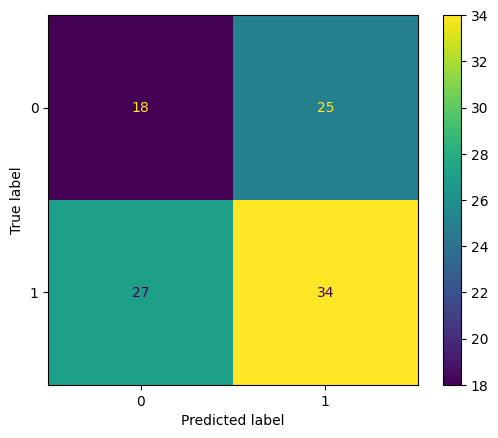

In [108]:
pred = knn_model.predict(test_data)
ConfusionMatrixDisplay.from_predictions(target_test, pred)

In [109]:
recall = recall_score(target_test, pred)
precision = precision_score(target_test, pred)
f1 = f1_score(target_test, pred)
print("Recall: ", recall)
print("Precsion: ", precision)
print("F1: ", f1)

Recall:  0.5573770491803278
Precsion:  0.576271186440678
F1:  0.5666666666666667


####**h) Which of these methods appears to provide the best results on this data?**

#####<font color="green">**Answer:**</font>
In conclusion among different models, LDA and QDA have shown the best results. LR and KNN performed poorly on this problem. LDA was slightly better for this dataset and it can be a reason that the enderlying pattern in our data is linear. About QDA, it was approximately as well as LDA. It likely that QDA is overfitted on train data so it has a worse performance on test set.